In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('topic3_regression_data.csv')
ndata = df.shape[0]
x1 = df['x1']
x2 = df['x2']
y = df['y']
print(ndata)

100


In [3]:
reg = LinearRegression().fit(df[['x1','x2']], df['y'])
beta_ols = np.append(reg.intercept_,reg.coef_)
print(beta_ols)

[ 1.15736763 -0.48388328  0.85474407]


# how to calculate the gradient


$ obj = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 $

$ \frac{\partial obj}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n 2(\hat{y}_i - y_i)$

$ \frac{\partial obj}{\partial \beta_1} = \frac{1}{n} \sum_{i=1}^n 2(\hat{y}_i - y_i)x_{1i}$

$ \frac{\partial obj}{\partial \beta_2} = \frac{1}{n} \sum_{i=1}^n 2(\hat{y}_i - y_i)x_{2i}$

$ \nabla obj = \left( \frac{\partial obj}{\partial \beta_0}, \frac{\partial obj}{\partial \beta_1}, \frac{\partial obj}{\partial \beta_2}\right) $

In [4]:
# gradient descent parameters

learnRate = 1e-3
epochs = 200

# gradient descent

In [5]:
# regular gradient descent

GDError = np.zeros(epochs)
beta = np.zeros(3)
for ep in range(epochs):
    yhat = beta[0] + beta[1]*x1 + beta[2]*x2
    
    grad0 = np.mean(2.0*(yhat-y))
    grad1 = 2.0*np.mean((yhat-y)*x1)
    grad2 = 2.0*np.mean((yhat-y)*x2)
    grad = np.array([grad0,grad1,grad2])
    
    beta -= learnRate*grad
    
    
    GDError[ep] = np.mean((yhat-y)**2)
    

print(GDError[ep])
print(beta)
print(beta_ols)

1.4021346142727227
[ 0.40594401 -0.21601624  0.30157076]
[ 1.15736763 -0.48388328  0.85474407]


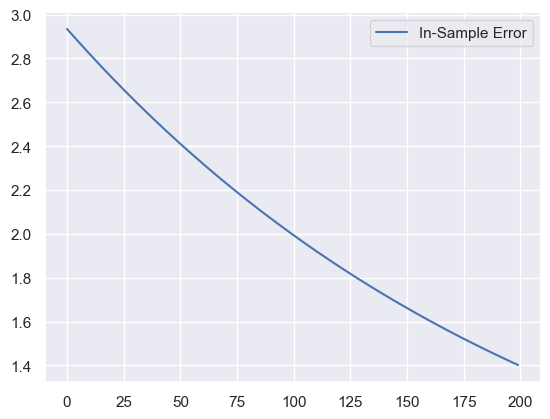

In [6]:
dfGD = pd.DataFrame({'In-Sample Error': GDError})
sns.lineplot(data=dfGD);

# stochastic gradient descent

In [7]:
batches = 10
dat_per_bat = ndata//batches

In [8]:
epochs = 200
# stochastic gradient descent
SGDError = np.zeros(epochs)
beta = np.zeros(3)
for ep in range(epochs):
    shuf = np.random.choice(range(ndata),size=ndata,replace=False)
    for bat in range(batches):
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        yhat = beta[0] + beta[1]*x1[this_bat] + beta[2]*x2[this_bat]

        grad0 = 2.0*np.mean(yhat-y[this_bat])
        grad1 = 2.0*np.mean((yhat-y[this_bat])*x1[this_bat])
        grad2 = 2.0*np.mean((yhat-y[this_bat])*x2[this_bat])
        grad = np.array([grad0,grad1,grad2])
        beta -= learnRate*grad

    yhat = beta[0] + beta[1]*x1 + beta[2]*x2
    SGDError[ep] = np.mean((yhat-y)**2)

print(beta)
print(beta_ols)

[ 1.14071603 -0.48516009  0.84327823]
[ 1.15736763 -0.48388328  0.85474407]


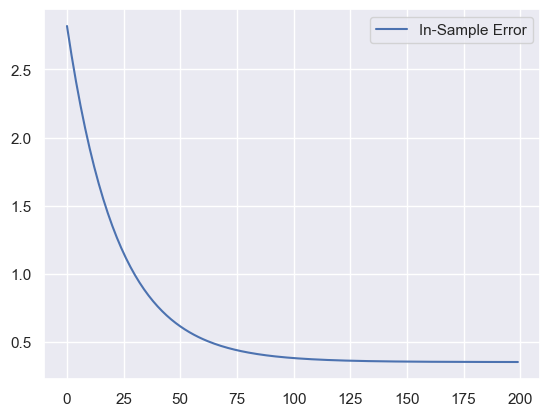

In [9]:
dfSGD = pd.DataFrame({'In-Sample Error': SGDError})
sns.lineplot(data=dfSGD);